<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values('duration', ascending = False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

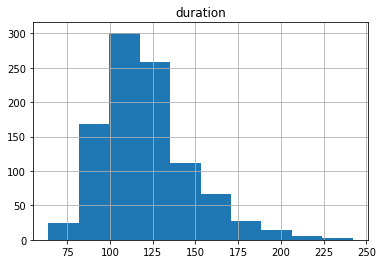

In [7]:
# Answer:
fig, ax = plt.subplots()
movies.hist('duration', ax=ax);

#### Use a box plot to display that same data.

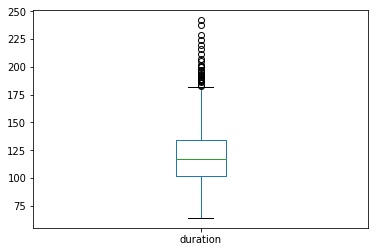

In [8]:
# Answer:
fig, ax = plt.subplots()
movies.loc[:, 'duration'].plot(kind='box', ax=ax);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
movies.loc[:, 'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

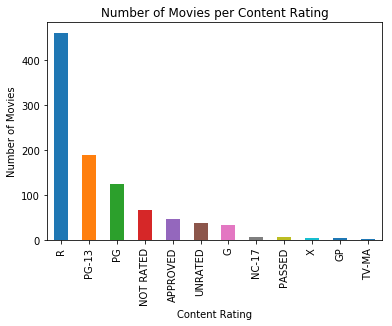

In [10]:
# Answer:
fig, ax = plt.subplots()
movies.loc[:, 'content_rating'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Content Rating')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies per Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
unrated_movies = movies.loc[:, 'content_rating'].isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP'])
ratingschangedf = movies.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')
ratingschangedf.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
ratingschangedf.replace(['X', 'TV-MA'], 'NC-17', inplace=True)
ratingschangedf.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [13]:
# Answer:
ratingschangedf.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
#Look at rows where content_rating is null (there are only 3):
ratingschangedf.loc[ratingschangedf.loc[:,'content_rating'].isnull(), :]
#genres are  biography, action, & adventure

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [15]:
#Check what content ratings are most common for each genre and actor
ratingschangedf.groupby(['genre', 'content_rating']).count()

star_rating  title  duration  actors_list
genre     content_rating                                           
Action    G                         1      1         1            1
          PG                       11     11        11           11
          PG-13                    44     44        44           44
          R                        67     67        67           67
          UNRATED                  12     12        12           12
Adventure G                         2      2         2            2
          PG                       21     21        21           21
          PG-13                    23     23        23           23
          R                        17     17        17           17
          UNRATED                  11     11        11           11
Animation G                        20     20        20           20
          PG                       25     25        25           25
          PG-13                     5      5         5            5
          R                         5      5         5            5
          UNRATED                   7      7         7            7
Biography G                         2      2         2            2
          PG                        6      6         6            6
          PG-13                    29     29        29           29
          R                        36     36        36           36
          UNRATED                   3      3         3            3
Comedy    G                         2      2         2            2
          NC-17                     2      2         2            2
          PG                       23     23        23           23
          PG-13                    23     23        23           23
          R                        73     73        73           73
          UNRATED                  33     33        33           33
Crime     NC-17                     2      2         2            2
          PG                        6      6         6            6
          PG-13                     4      4         4            4
          R                        87     87        87           87
...                               ...    ...       ...          ...
Drama     NC-17                     6      6         6            6
          PG                       25     25        25           25
          PG-13                    55     55        55           55
          R                       143    143       143          143
          UNRATED                  46     46        46           46
Family    G                         1      1         1            1
          PG                        1      1         1            1
Fantasy   R                         1      1         1            1
Film-Noir UNRATED                   3      3         3            3
History   UNRATED                   1      1         1            1
Horror    NC-17                     2      2         2            2
          PG                        1      1         1            1
          PG-13                     2      2         2            2
          R                        16     16        16           16
          UNRATED                   8      8         8            8
Mystery   G                         1      1         1            1
          PG                        1      1         1            1
          PG-13                     2      2         2            2
          R                         6      6         6            6
          UNRATED                   6      6         6            6
Sci-Fi    PG-13                     1      1         1            1
          R                         3      3         3            3
          UNRATED                   1      1         1            1
Thriller  PG                        1      1         1            1
          R                         3      3         3            3
          UNRATED                   1      1         1            1
Western   PG  

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [19]:
# Answer:
avg_rating_2plus_hours = round(movies.loc[movies.loc[:, 'duration'] >=120, 'star_rating'].mean(), 3)
avg_rating_under2hours = round(movies.loc[movies.loc[:, 'duration'] <120, 'star_rating'].mean(), 3)
print("Average rating for 2+ hour movies:", avg_rating_2plus_hours)
print("Average rating for <2 hour movies:", avg_rating_under2hours)
if avg_rating_2plus_hours > avg_rating_under2hours:
    print("2+ hour movies are typically rated higher than those under 2 hours.")
else:
    print("Movies with durations under 2 hours are typically rated higher than those over 2 hours.")

Average rating for 2+ hour movies: 7.949
Average rating for <2 hour movies: 7.839
2+ hour movies are typically rated higher than those under 2 hours.


#### Use a visualization to detect whether there is a relationship between duration and star rating.

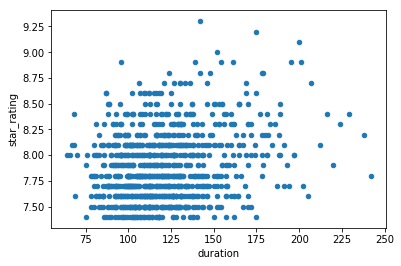

In [21]:
# Answer:
fig, ax = plt.subplots()
movies.plot(kind='scatter', x='duration', y= 'star_rating', ax=ax)

#### Calculate the average duration for each genre.

In [20]:
# Answer:
movies.loc[:, ['genre', 'duration']].groupby('genre').mean()
# or - prints out both star rating & duration: movies.groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

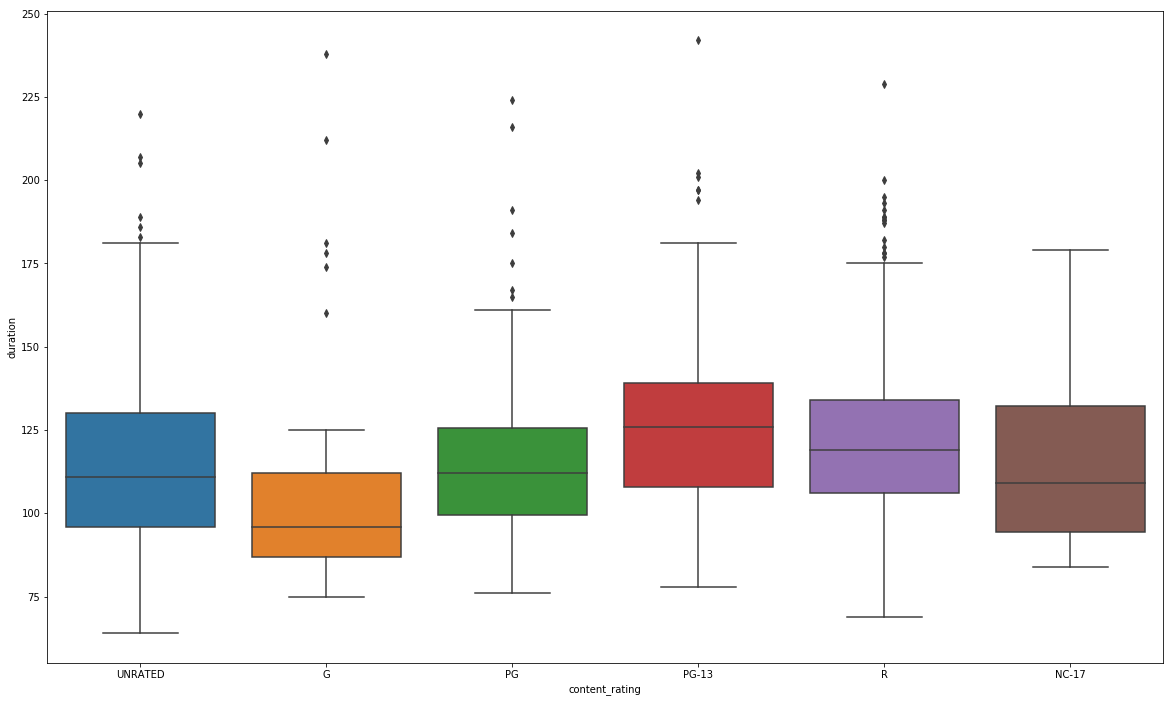

In [45]:
# Answer:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,12))
boxplotdata = ratingschangedf.loc[:, ['content_rating', 'duration']]
sns.boxplot(x='content_rating', y = 'duration', data = boxplotdata, order = ['UNRATED', 'G', 'PG', 'PG-13', 'R', 'NC-17']);

Methodology: 
- Plot boxplots of duration by each content rating, in order to view median & spread of each
- Used Seaborn to visualize, which allowed me to reorder the columns by rating

#### Determine the top rated movie (by star rating) for each genre.

In [ ]:
# Answer:

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!